## Regressão linear

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
datafile = 'dados/ex1data1.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)

#Lendo na forma de matriz "X" e vetor "y"
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))

m = y.size

# Por convenção, a primeira coluna é preenchida de 1's
X = np.insert(X,0,1,axis=1)

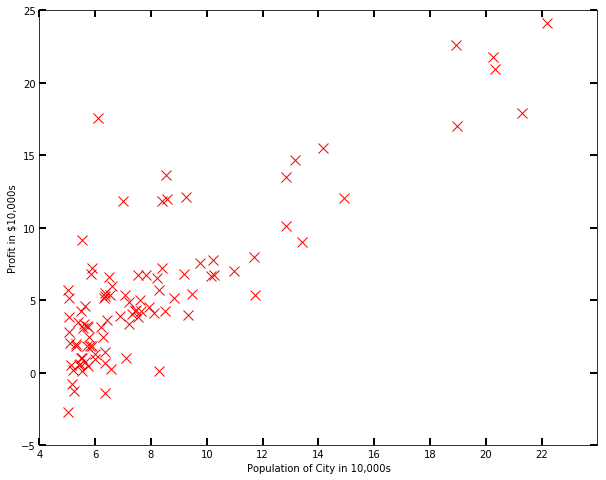

In [5]:
plt.figure(figsize=(10,8))
plt.plot(X[:,1],y[:,0],'rx',markersize=10)
plt.tick_params(axis='both', direction='in', width=2, length=7,bottom='on', top='on', left='on', right='on')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.xticks(np.arange(4, 24, 2))
plt.ylim(-5, 25)
plt.xlim(4, 24)
plt.show()

In [6]:

def computarCusto(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0   
    J = 1/(2*m)*np.sum(np.square(X.dot(theta)-y))
    return(J)

In [7]:
print(computarCusto(X, y))

32.0727338775


In [8]:
def GD(X, y, theta=[[0],[0]], alpha=0.01, epsilon=0.0001):
    m = y.size
    J_history = []
    while True:
        old_theta = theta
        theta = theta - alpha*(1/m)*np.dot(X.T,X.dot(theta)-y)
        J_history.append(computarCusto(X, y, theta))
        if np.linalg.norm(theta) - np.linalg.norm(old_theta) < epsilon:
            break
    return(theta, J_history)


In [9]:
theta, Cost_J = GD(X, y)

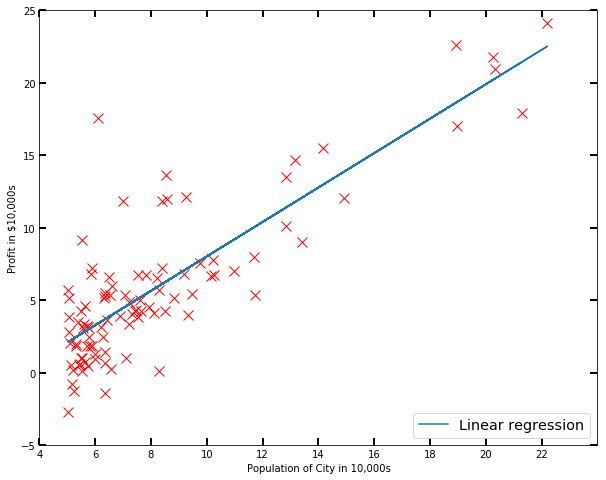

In [10]:
## traçar linha do gd
plt.figure(figsize=(10,8))
plt.plot(X[:,1],y[:,0],'rx',markersize=10)
plt.tick_params(axis='both', direction='in', width=2, length=7,bottom='on', top='on', left='on', right='on')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.xticks(np.arange(4, 24, 2))
plt.ylim(-5, 25)
plt.xlim(4, 24)

plt.plot(X[:, 1], X.dot(theta), '-', label='Linear regression')
plt.legend(loc='lower right', shadow=False, fontsize='x-large', numpoints=1)
plt.show()

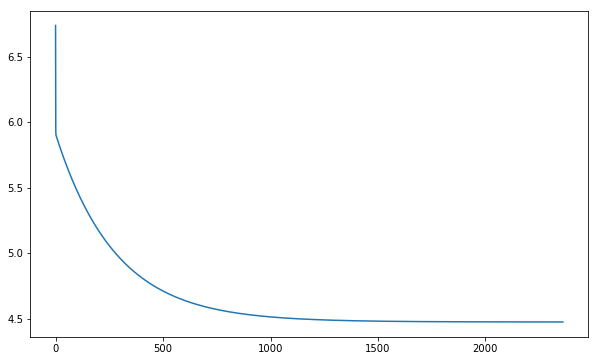

In [11]:
## plotar convergência
plt.figure(figsize=(10,6))
plt.plot(Cost_J)
plt.show()

In [12]:
predict1 = theta.T.dot(np.array([1, 3.5]));
print('Lucro de {:f} para uma população de 35,000 habitantes '.format( float(predict1*10000) ))
predict2 = theta.T.dot(np.array([1, 7]));
print('Lucro de {:f} para uma população de 70,000 habitantes '.format( float(predict2*10000) ))


Lucro de 3162.479172 para uma população de 35,000 habitantes 
Lucro de 44721.203758 para uma população de 70,000 habitantes 


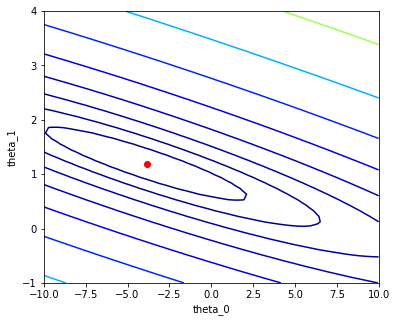

In [13]:
from mpl_toolkits.mplot3d import axes3d

# Grids
theta0 = np.linspace(-10, 10, 50)
theta1 = np.linspace(-1, 4, 50)
theta0_vals, theta1_vals = np.meshgrid(theta0, theta1, indexing='xy')

custos = np.zeros((theta0.size,theta1.size))

for (i,j),v in np.ndenumerate(custos):
    custos[i,j] = computarCusto(X,y, theta=[[theta0_vals[i,j]], [theta1_vals[i,j]]])



fig1 = plt.figure(figsize=(6,5))
ax = plt.contour(theta0_vals, theta1_vals, custos, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
plt.scatter(theta[0],theta[1], c='r')

plt.xlabel('theta_0')
plt.ylabel('theta_1')

plt.show()

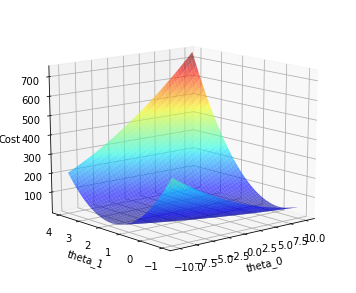

In [14]:
fig2 = plt.figure(figsize=(6,5))
ax = fig2.gca( projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, custos, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax.set_zlabel('Cost')
ax.set_zlim(custos.min(),custos.max())
ax.view_init(elev=15, azim=230)

plt.xlabel('theta_0')
plt.ylabel('theta_1')

plt.show()

## Regressão Linear univariável

In [21]:
datafile = 'dados/ex1data2.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True)


X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)


In [22]:

def normalizarCaracteristica(X):
    
    X_norm = X
    valor_media    = np.zeros((1, X.shape[1]))
    desvio_padrao = np.zeros((1, X.shape[1]))

    for i in range(X.shape[1]):
        # Evitar usar a primeira coluna
        if not i: continue
        valor_media[:,i] = np.mean(X[:,i])
        desvio_padrao[:,i] = np.std(X[:,i])
        X_norm[:,i] = (X[:,i] - float(valor_media[:,i]))/float(desvio_padrao[:,i])

    return X_norm, valor_media, desvio_padrao
Xnorm,val_media,desvio_padrao = normalizarCaracteristica(X)


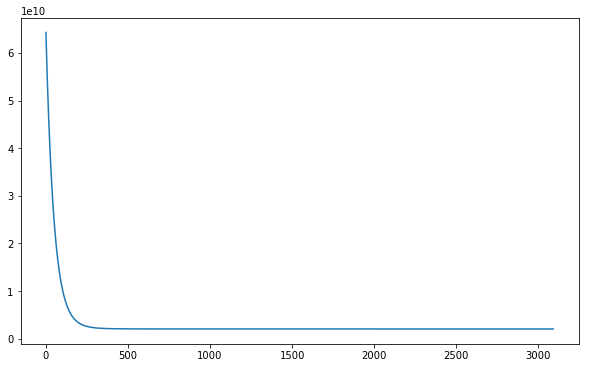

In [23]:
theta = np.zeros((Xnorm.shape[1],1))
theta, Cost_J = GD(Xnorm, y,theta)

plt.figure(figsize=(10,6))
plt.plot(Cost_J)
plt.show()
plt.savefig('custo_multi.png')

# Regressão logística


In [24]:
datafile = 'dados/ex2data1.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size 
X = np.insert(X,0,1,axis=1)


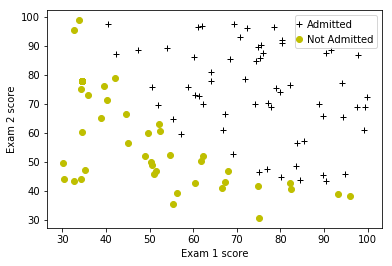

In [25]:
pos = np.where(y==1)
neg = np.where(y==0)

p1 = plt.plot(X[pos,1],X[pos,2],'k+',label='Admitted')
p2 = plt.plot(X[neg,1],X[neg,2],'yo',label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((p1[0], p2[0]), ('Admitted', 'Not Admitted'), numpoints=1, handlelength=0)
plt.show()


In [26]:
theta = np.zeros((X.shape[1],1))

def sigmoide(z):
    return(1 / (1 + np.exp(-z)))

def funcaoCustoRegressaoLogistica(theta,X, y):
    m = y.size
    J = 0

    g_x = sigmoide(X.dot(theta))

    J = -1*(1/m)*( np.log(g_x).T.dot(y)  +  np.log(1-g_x).T.dot(1-y) )

    return(J[0])

def GD(theta, X, y):
    m = y.size
    h = sigmoide(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())


In [27]:
cost = funcaoCustoRegressaoLogistica(theta,X,y)
grad = GD(theta, X, y)

print('Cust: \n', cost)
print('Grad: \n', grad)


Cust: 
 [ 0.69314718]
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [28]:
from scipy.optimize import minimize
res = minimize(funcaoCustoRegressaoLogistica, theta, args=(X,y), method=None, jac=GD, options={'maxiter':400})

prob = sigmoide(np.array([1, 45, 85]).dot(res.x.T))
print('Um candidato com notas 45 e 85 será aprovado com probabilidade de ',prob)

Um candidato com notas 45 e 85 será aprovado com probabilidade de  0.776290724059


D:\Programas\Dev\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


In [29]:

def predizer(theta, X):
    m = X.shape[0] 
    p = np.zeros((m, 1))

    sigValue = sigmoide( np.dot(X,theta) )
    p = sigValue >= 0.5

    return p

p = predizer(res.x, X) 
print('Porcentagem de acertos : {}%'.format(100*sum(p == y.ravel())/p.size))

Porcentagem de acertos : 89.0%
